# Exercizes on clustering

Program to read a data file in csv format

The data file has the following header: number of samples, number of characteristics, list of characteristics (comma separated)

Lines contain one example per line.
For each row there is a list of real numbers (separated by commas) which are the values of the characteristics.

In [6]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data, feature_names, n_samples, n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="content/"
file_path="./datasets/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: ", file_name1, " - n samples = ", n_samples1, " - n features = ", n_features1)
print("dataset n. 1: ", file_name2, " - n samples = ", n_samples2, " - n features = ", n_features2)
print("ddataset n. 1: ", file_name3, " - n samples = ", n_samples3, " - n features = ", n_features3)

dataset n. 1:  3-clusters.csv  - n samples =  150  - n features =  2
dataset n. 1:  dataset-DBSCAN.csv  - n samples =  6118  - n features =  2
ddataset n. 1:  CURE-complete.csv  - n samples =  86558  - n features =  2


The following program plots the dataset n.1

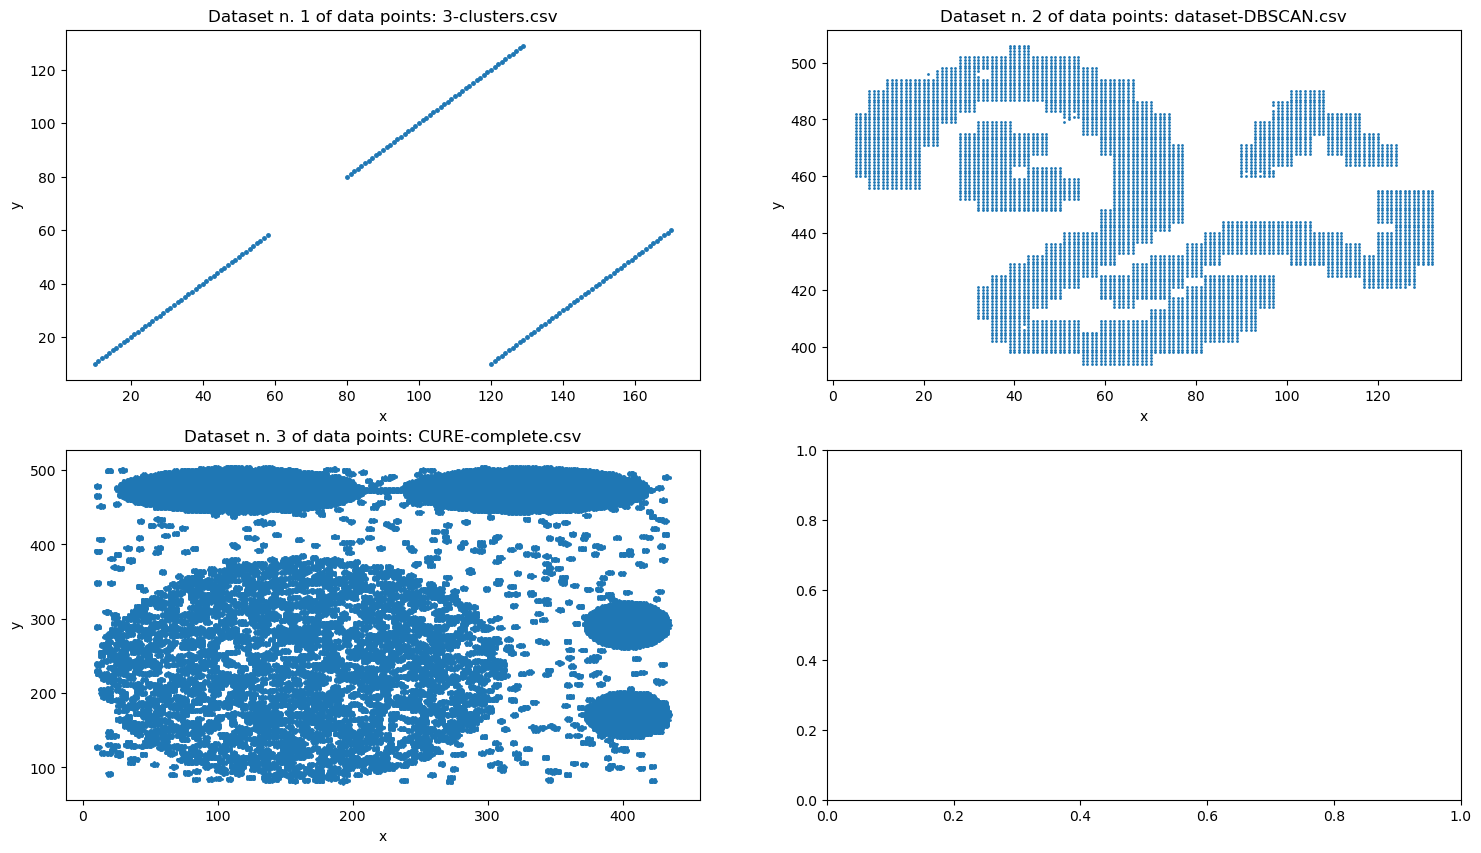

In [7]:
import matplotlib.pyplot as plt

x = np.linspace(0.0, 10.0, 1000)
y = np.sin(x)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

#plot the datasets
# dataset1: 3-clusters.csv
ax[0,0].plot(data1[:,0], data1[:,1], '.', markersize=5)
ax[0,0].set_title('Dataset n. 1 of data points: 3-clusters.csv')
ax[0,0].set_xlabel(feature_names1[0])
ax[0,0].set_ylabel(feature_names1[1])

# dataset2: dataset-DBSCAN.csv
ax[0,1].plot(data2[:,0], data2[:,1], '.', markersize=2)
ax[0,1].set_title('Dataset n. 2 of data points: dataset-DBSCAN.csv')
ax[0,1].set_xlabel(feature_names2[0])
ax[0,1].set_ylabel(feature_names2[1])

# dataset3: CURE-complete.csv
ax[1,0].plot(data3[:,0], data3[:,1], '.', markersize=2)
ax[1,0].set_title('Dataset n. 3 of data points: CURE-complete.csv')
ax[1,0].set_xlabel(feature_names3[0])
ax[1,0].set_ylabel(feature_names3[1])

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [8]:
import csv
import sys
from os.path import join

import numpy as np

file_path="./datasets/"
file_name1="3-clusters.csv"

data1, feature_names1, n_samples1, n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+") in cluster n."+str(kmeans1.labels_[i]))

Example n.0=(10.0,10.0) in cluster n.0
Example n.1=(11.0,11.0) in cluster n.0
Example n.2=(12.0,12.0) in cluster n.0
Example n.3=(13.0,13.0) in cluster n.0
Example n.4=(14.0,14.0) in cluster n.0
Example n.5=(15.0,15.0) in cluster n.0
Example n.6=(16.0,16.0) in cluster n.0
Example n.7=(17.0,17.0) in cluster n.0
Example n.8=(18.0,18.0) in cluster n.0
Example n.9=(19.0,19.0) in cluster n.0
Example n.10=(20.0,20.0) in cluster n.0
Example n.11=(21.0,21.0) in cluster n.0
Example n.12=(22.0,22.0) in cluster n.0
Example n.13=(23.0,23.0) in cluster n.0
Example n.14=(24.0,24.0) in cluster n.0
Example n.15=(25.0,25.0) in cluster n.0
Example n.16=(26.0,26.0) in cluster n.0
Example n.17=(27.0,27.0) in cluster n.0
Example n.18=(28.0,28.0) in cluster n.0
Example n.19=(29.0,29.0) in cluster n.0
Example n.20=(30.0,30.0) in cluster n.0
Example n.21=(31.0,31.0) in cluster n.0
Example n.22=(32.0,32.0) in cluster n.0
Example n.23=(33.0,33.0) in cluster n.0
Example n.24=(34.0,34.0) in cluster n.0
Example n.

In the following program we plot the clusters

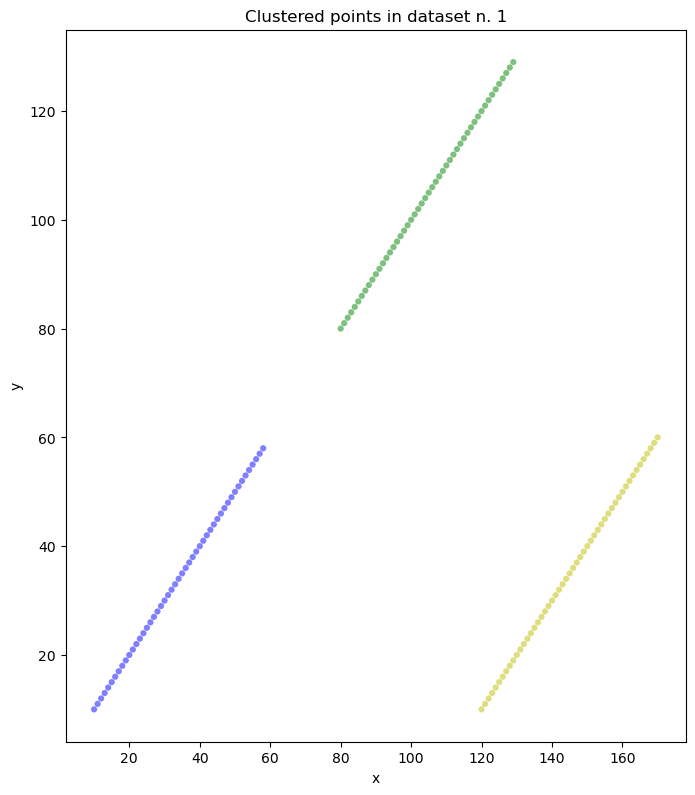

In [9]:
import matplotlib.pyplot as plt

plt.style.use('default')
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','y','g','k','m','c','r','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=20, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()


# In the following program we cluster the dataset n.2 with K-means.
From the plot of dataset n.2 we see 3 separated clusters. Thus k=3
The best value of k depends on how the data is distributed.

In [10]:
import csv
import sys
from os.path import join

import numpy as np

file_path="./datasets/"
file_name2="dataset-DBSCAN.csv"
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)

i=0
for i in range(n_samples2):
    print("Example n."+str(i)+"=("+str(data2[i,0])+","+str(data2[i,1])+") in cluster n."+str(kmeans1.labels_[i]))

Example n.0=(5.0,482.0) in cluster n.0
Example n.1=(5.0,481.0) in cluster n.0
Example n.2=(5.0,480.0) in cluster n.0
Example n.3=(5.0,479.0) in cluster n.0
Example n.4=(5.0,478.0) in cluster n.0
Example n.5=(5.0,477.0) in cluster n.0
Example n.6=(5.0,476.0) in cluster n.0
Example n.7=(5.0,475.0) in cluster n.0
Example n.8=(5.0,474.0) in cluster n.0
Example n.9=(5.0,473.0) in cluster n.0
Example n.10=(5.0,472.0) in cluster n.0
Example n.11=(5.0,471.0) in cluster n.0
Example n.12=(5.0,470.0) in cluster n.0
Example n.13=(5.0,469.0) in cluster n.0
Example n.14=(5.0,468.0) in cluster n.0
Example n.15=(5.0,467.0) in cluster n.0
Example n.16=(5.0,466.0) in cluster n.0
Example n.17=(5.0,465.0) in cluster n.0
Example n.18=(5.0,464.0) in cluster n.0
Example n.19=(5.0,463.0) in cluster n.0
Example n.20=(5.0,462.0) in cluster n.0
Example n.21=(5.0,461.0) in cluster n.0
Example n.22=(5.0,460.0) in cluster n.0
Example n.23=(6.0,482.0) in cluster n.0
Example n.24=(6.0,481.0) in cluster n.0
Example n.

IndexError: index 150 is out of bounds for axis 0 with size 150

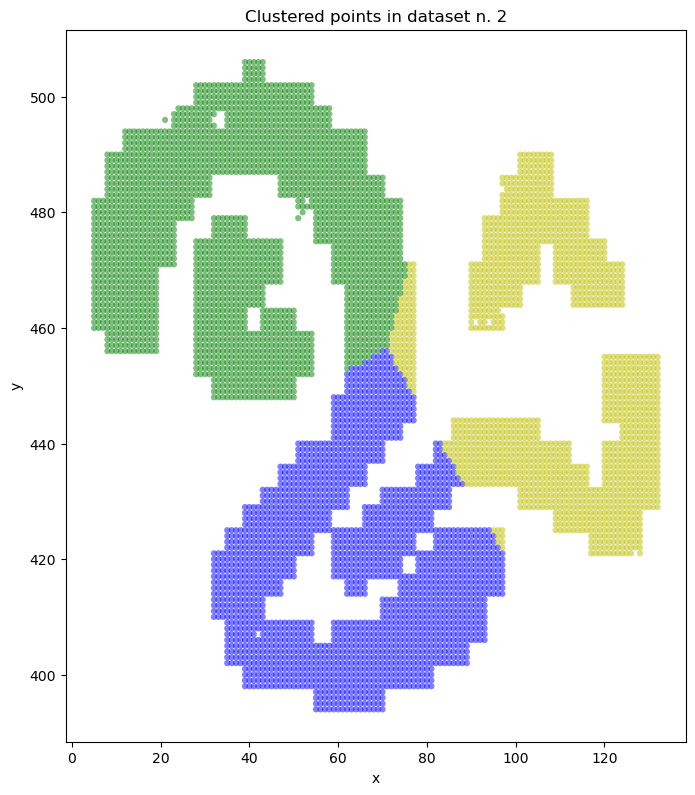

In [11]:
import matplotlib.pyplot as plt

plt.style.use('default')
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','y','g','k','m','c','r','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data2[i,0] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    data_list_y = [data2[i,1] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=20, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

# As you can see, some points/examples are classified incorrectly.
This is because the clusters have an irregular shape: the clusters have different sizes from each other.
To solve this problem we can think of increasing the number of clusters k.
I try with k = 4.
The best value of k depends on how the data is distributed.

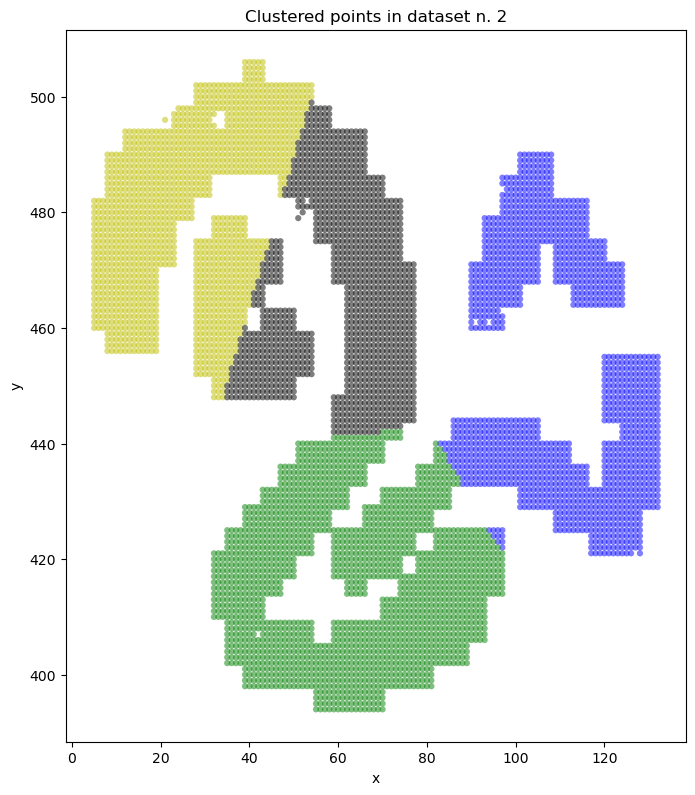

In [12]:
import csv
import sys
from os.path import join

import numpy as np

file_path="./datasets/"
file_name2="dataset-DBSCAN.csv"
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)

from sklearn.cluster import KMeans

np.random.seed(5)

k=4
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)

# plot
plt.style.use('default')
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','y','g','k','m','c','r','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data2[i,0] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    data_list_y = [data2[i,1] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=20, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

# In the following program we cluster the dataset n.3 with K-means.
From the plot of dataset n.2 we see 3 separated clusters. Thus k=3

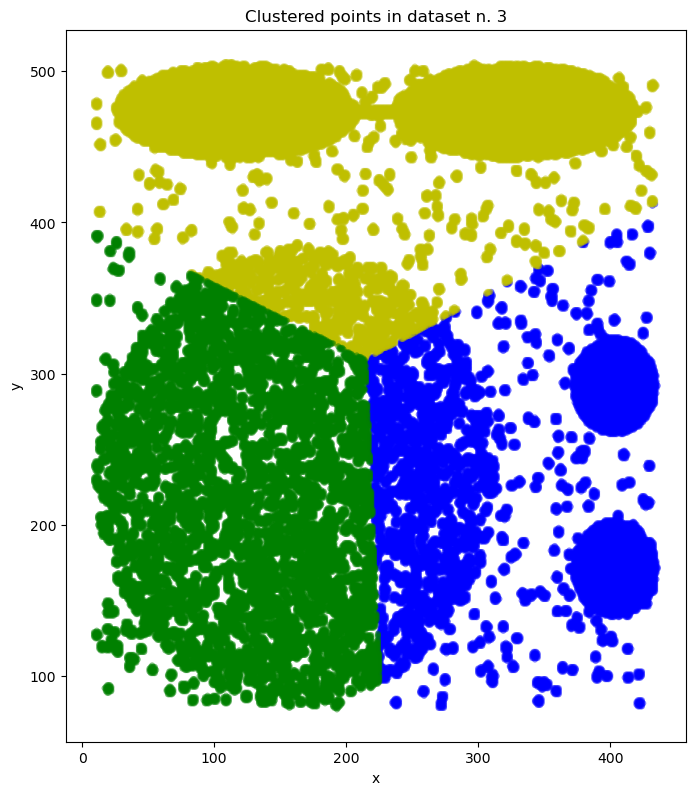

In [13]:
import csv
import sys
from os.path import join

import numpy as np

file_path="./datasets/"
file_name3="CURE-complete.csv"
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)

# plot
plt.style.use('default')
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','y','g','k','m','c','r','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data3[i,0] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    data_list_y = [data3[i,1] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=20, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

# As you can see, some points/examples are classified incorrectly.
This is because the clusters have an irregular shape: the clusters have different sizes from each other.
To solve this problem we can think of increasing the number of clusters k.
I try with k = 5.
The best value of k depends on how the data is distributed.

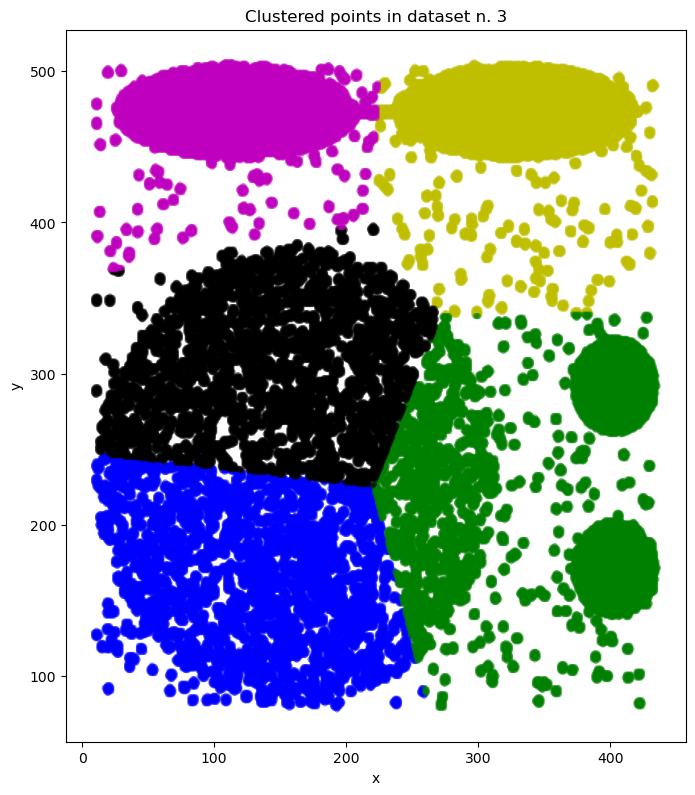

In [14]:
import csv
import sys
from os.path import join

import numpy as np

file_path="./datasets/"
file_name3="CURE-complete.csv"
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)

from sklearn.cluster import KMeans

np.random.seed(5)

k=5
kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)

# plot
plt.style.use('default')
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','y','g','k','m','c','r','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data3[i,0] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    data_list_y = [data3[i,1] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=20, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

# Quantitative evaluation of clusters in the three datasets: Silhouttes 
**Note:**
Execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [15]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def silhouetteAnalysis(dataset):
    range_n_clusters = [2, 3, 4, 5, 6]
    for n_clusters in range_n_clusters:
       # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(dataset) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
        cluster_labels = clusterer.fit_predict(dataset)
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(dataset, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            dataset[:, 0], dataset[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )
        
        plt.show()

# dataset 1: 3-clusters.csv

For n_clusters = 2 The average silhouette_score is : 0.5651096232579514


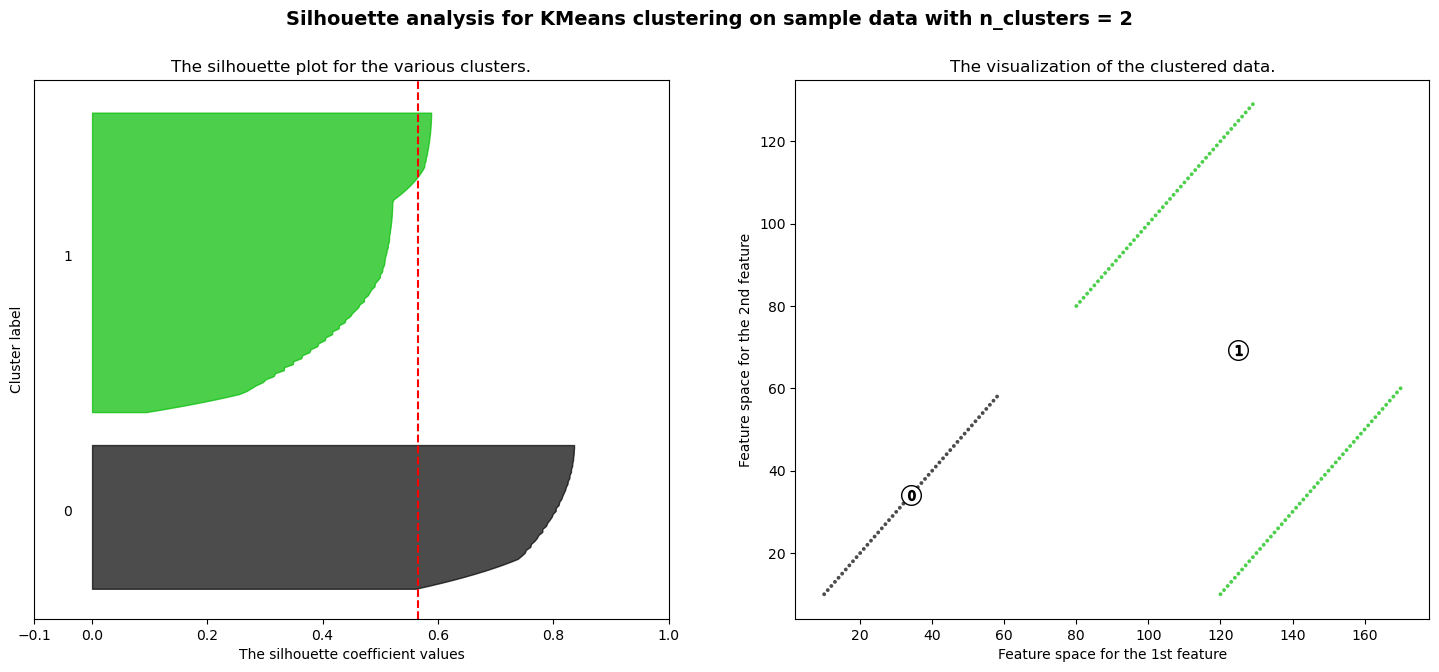

For n_clusters = 3 The average silhouette_score is : 0.7229402453727759


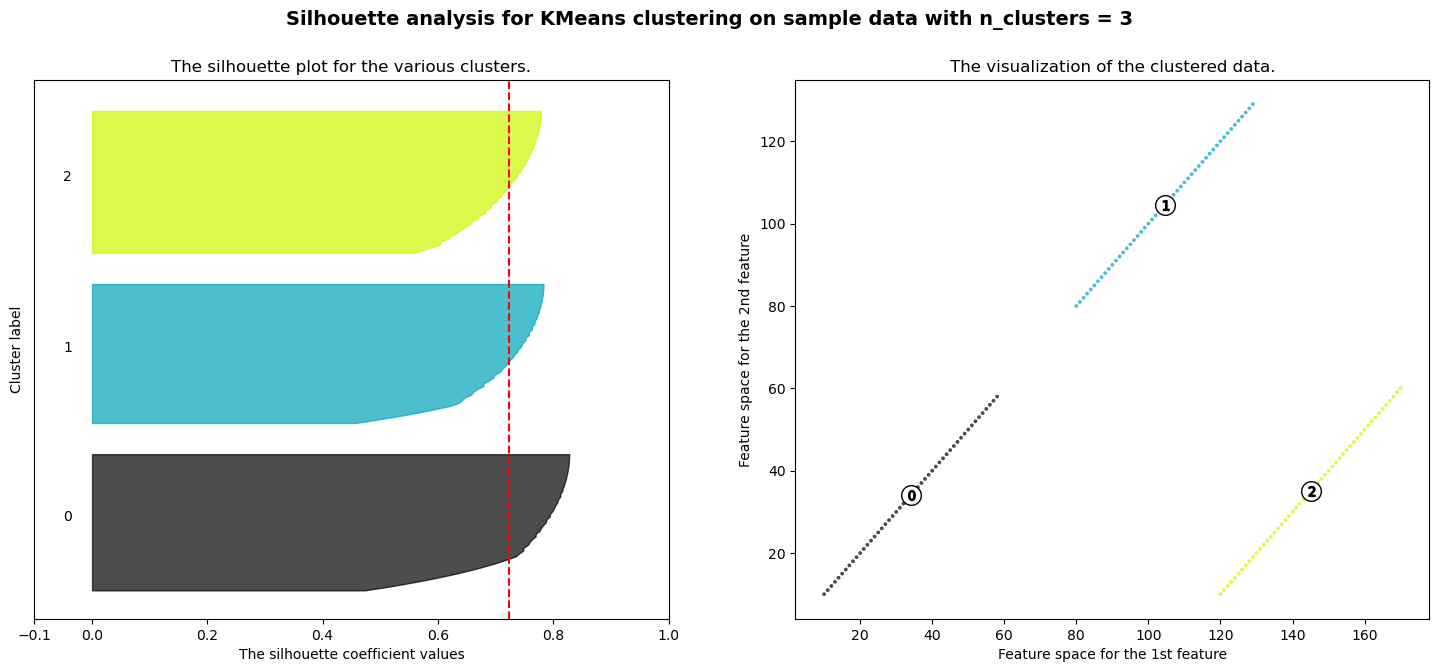

For n_clusters = 4 The average silhouette_score is : 0.6825234611999134


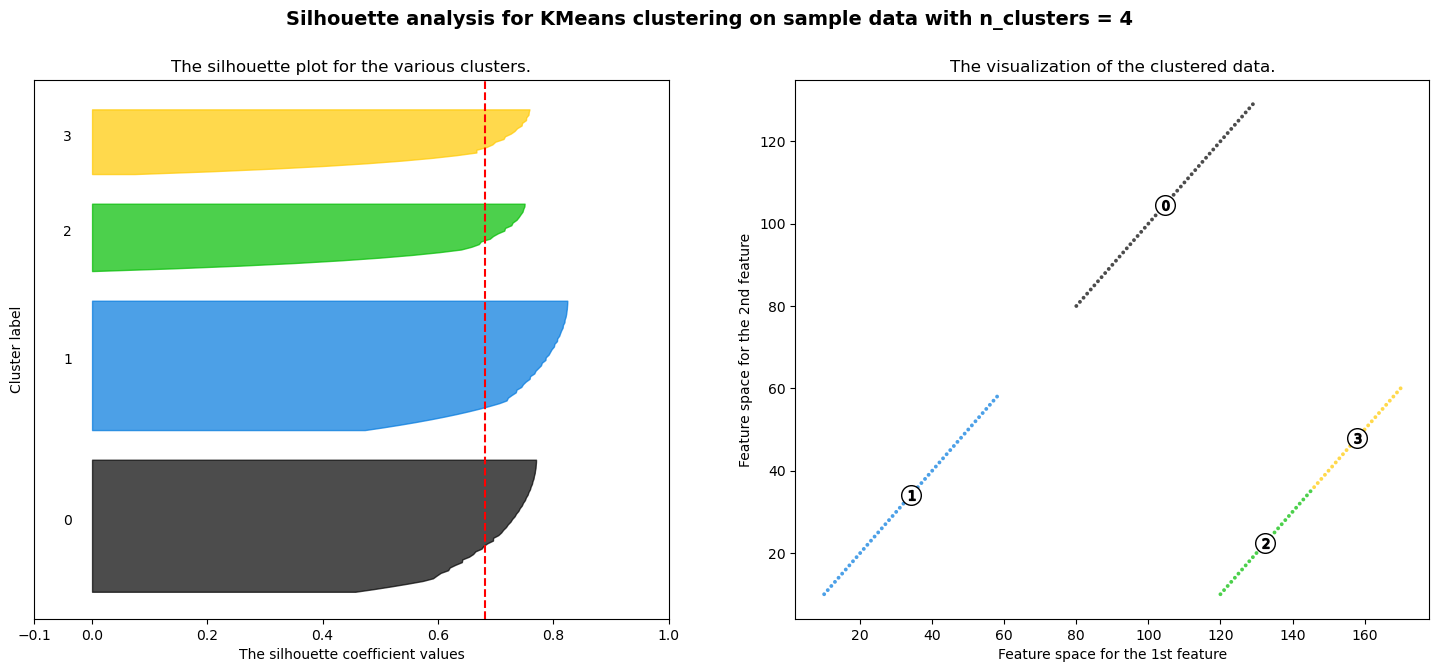

For n_clusters = 5 The average silhouette_score is : 0.6358957746571624


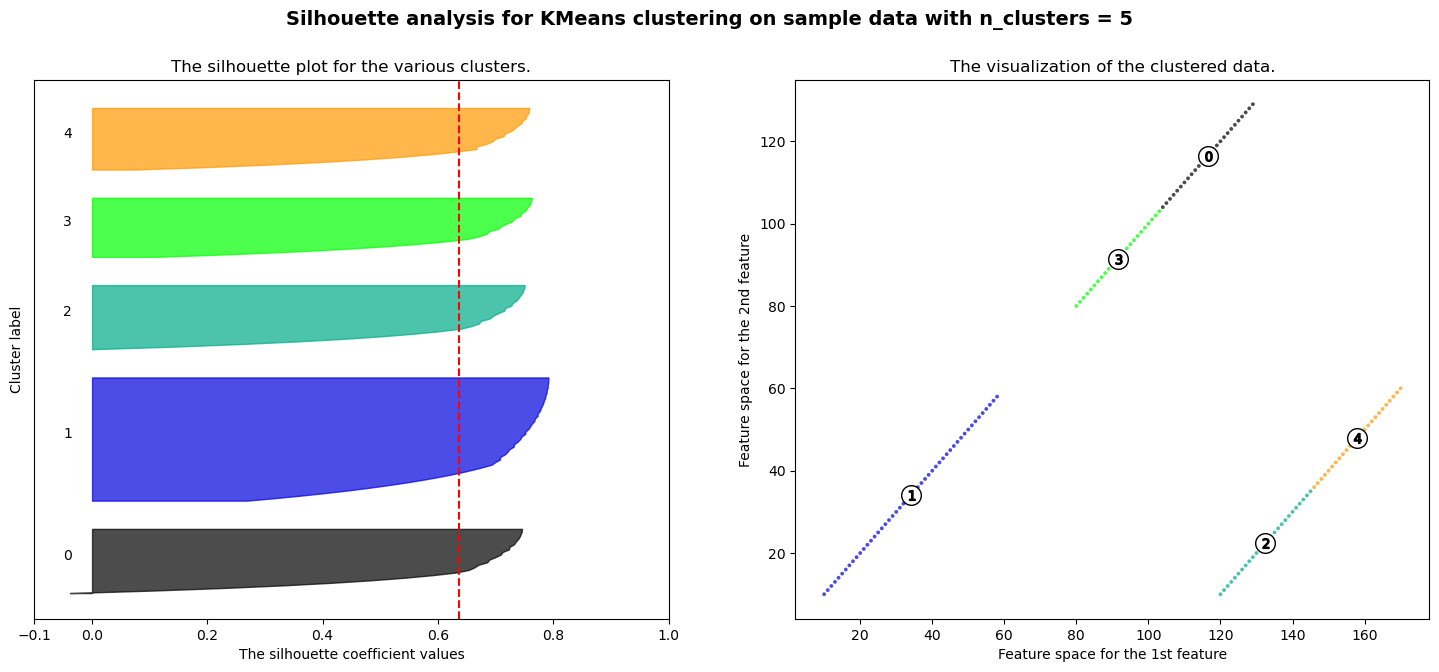

For n_clusters = 6 The average silhouette_score is : 0.6113126050223654


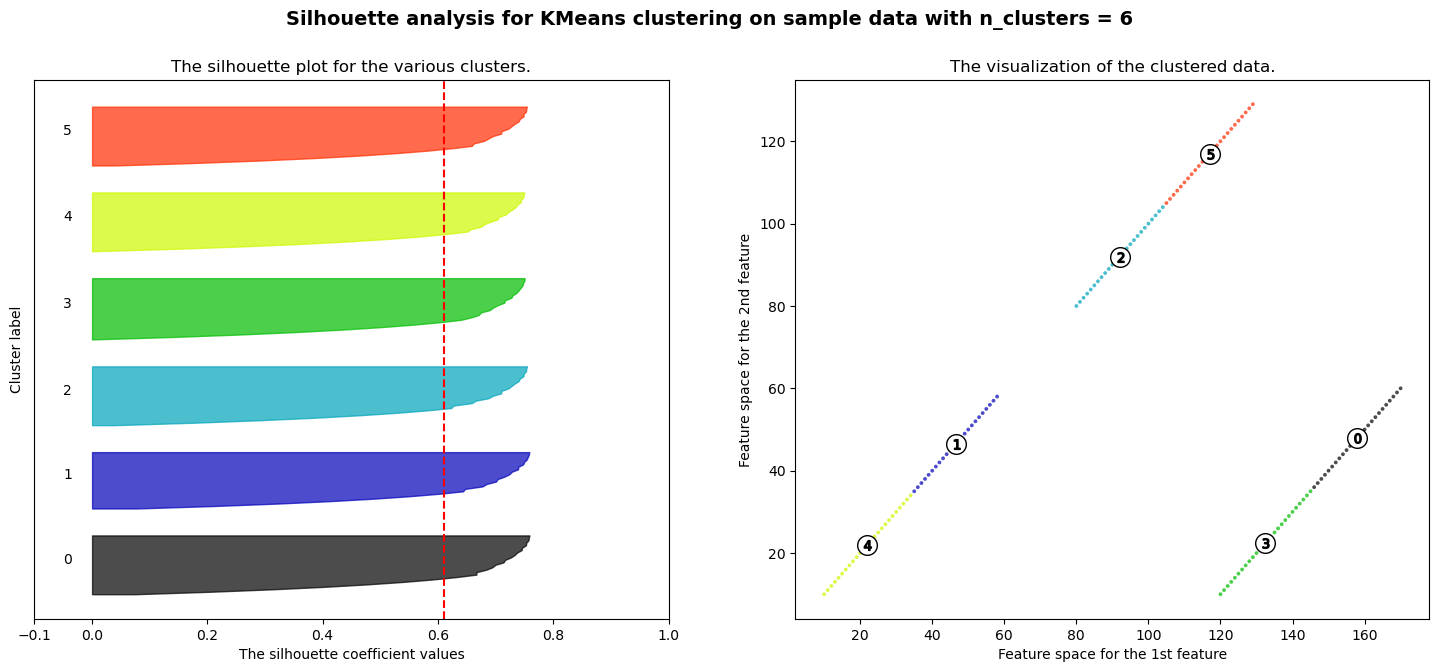

In [16]:
silhouetteAnalysis(data1)

# dataset 2: dataset-DBSCAN.csv

For n_clusters = 2 The average silhouette_score is : 0.43322366812579544


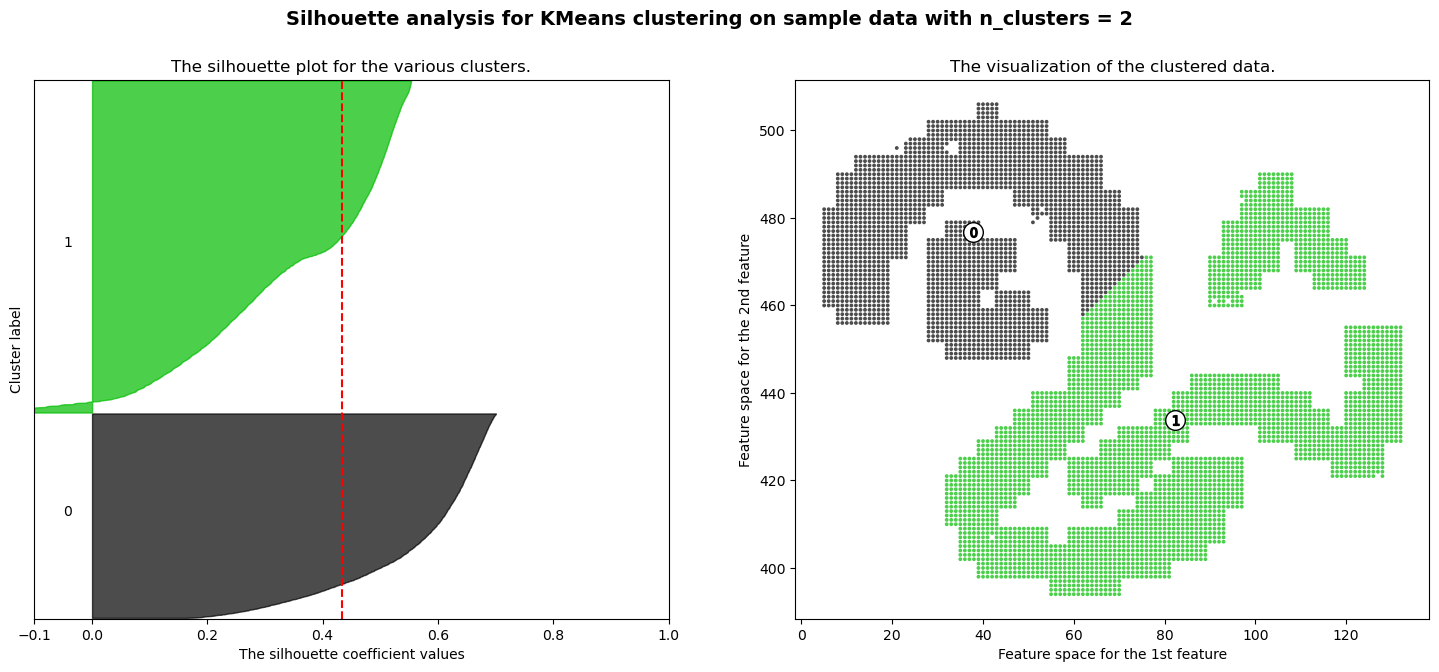

For n_clusters = 3 The average silhouette_score is : 0.4799133604477169


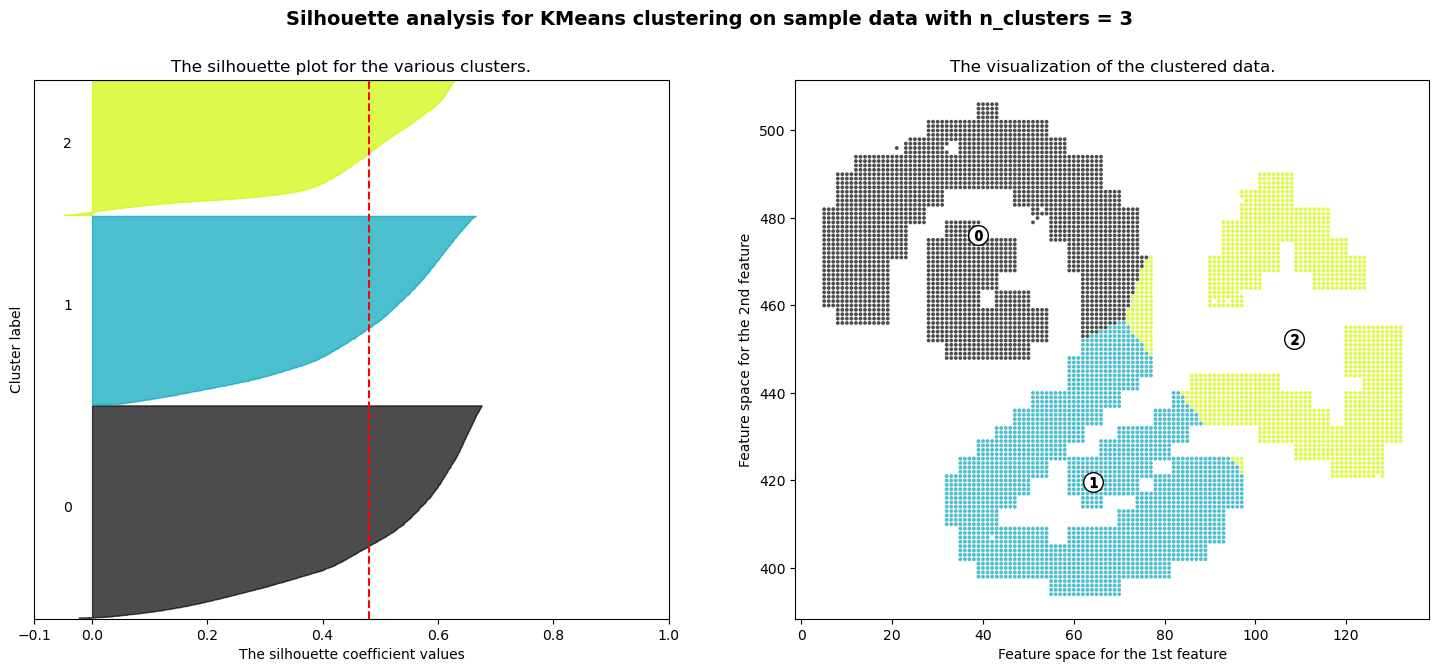

For n_clusters = 4 The average silhouette_score is : 0.41736481925553526


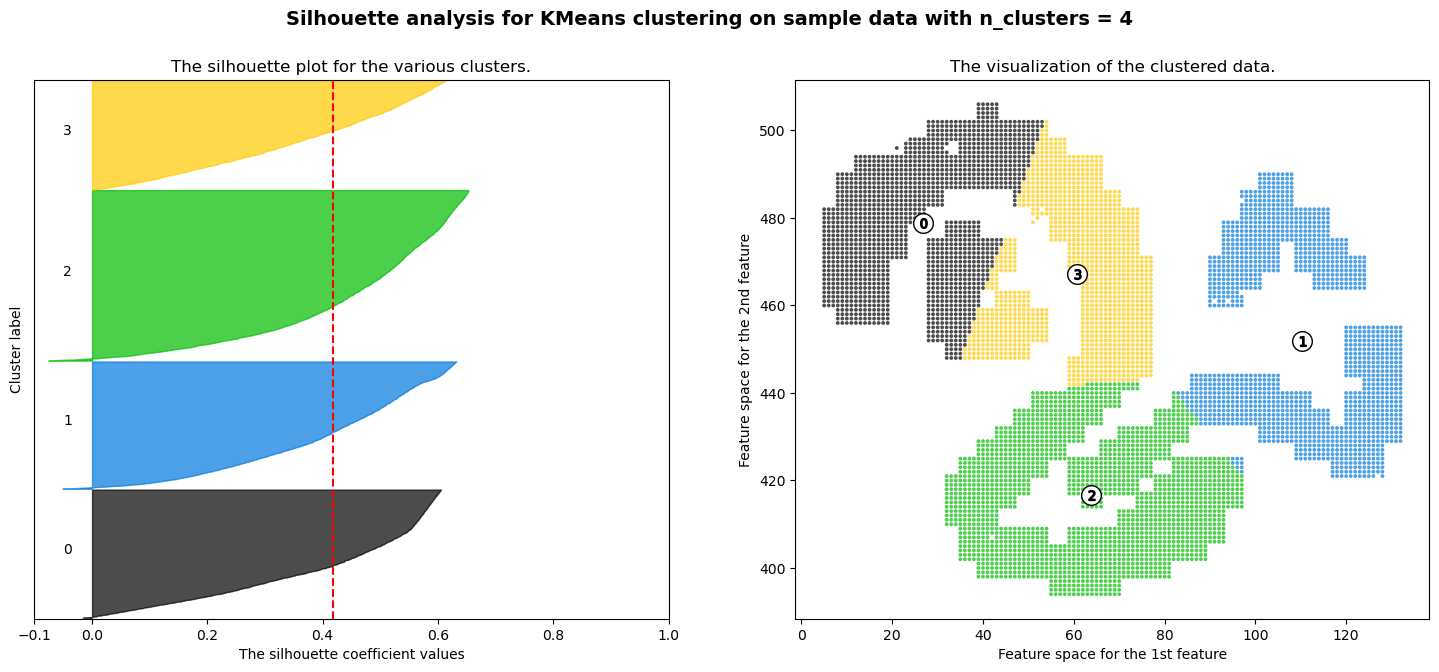

For n_clusters = 5 The average silhouette_score is : 0.42560503070470135


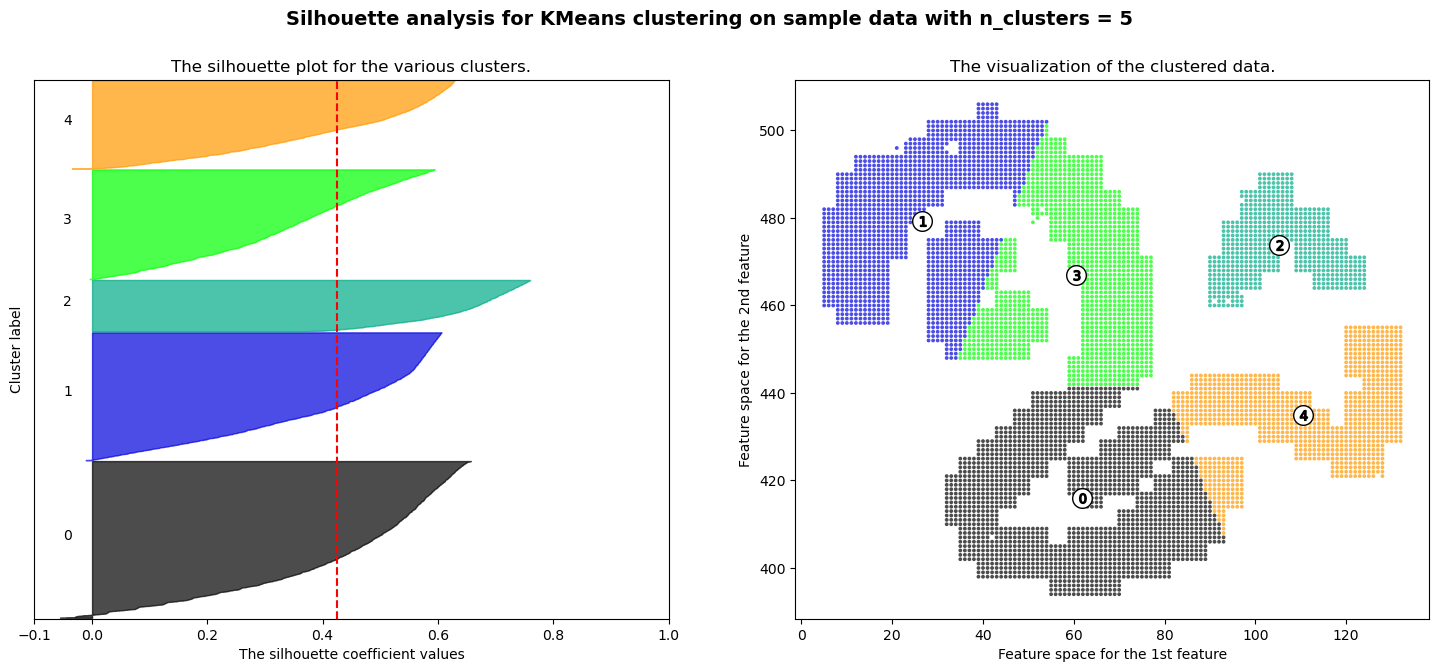

For n_clusters = 6 The average silhouette_score is : 0.41296908138576005


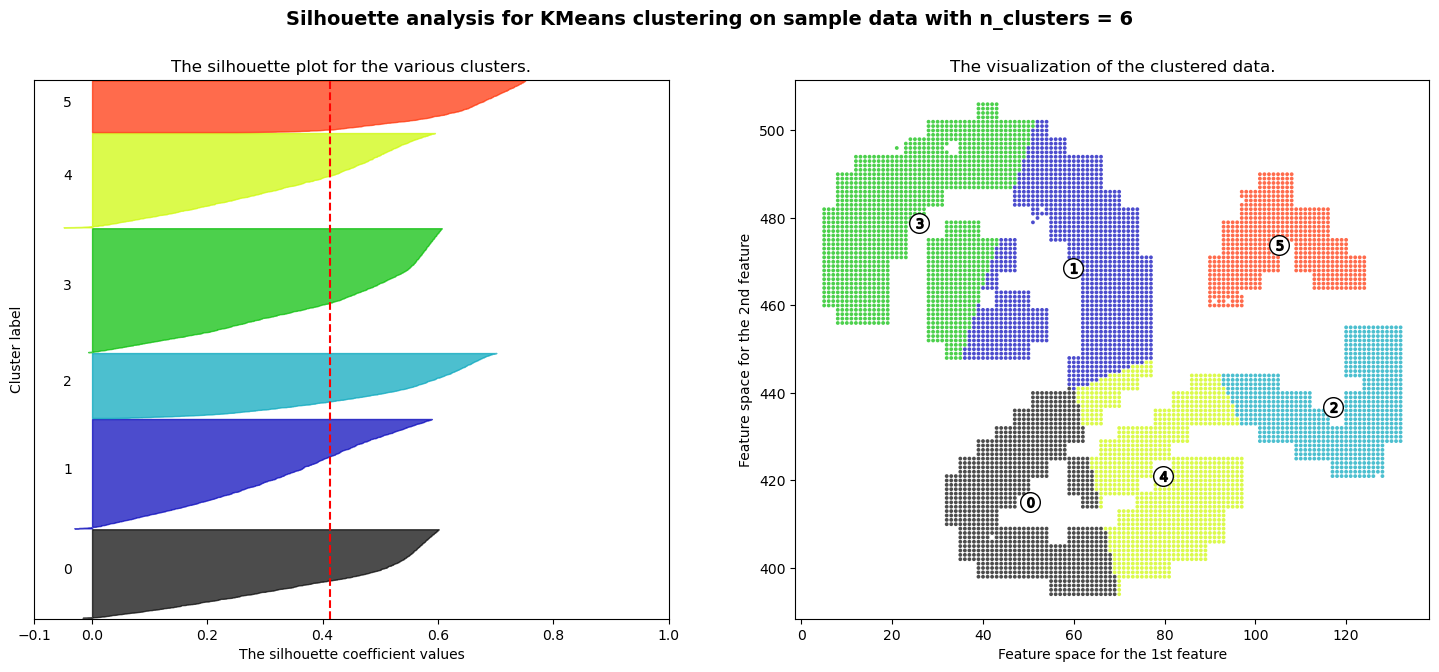

In [17]:
silhouetteAnalysis(data2)

# dataset 3: CURE-complete.csv

In [18]:
# silhouetteAnalysis(data3)

# In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

# DBSCAN - dataset-DBSCAN.csv

Estimated number of clusters: 6
Estimated number of noise points: 114
Estimated number of core points: 4978
Estimated number of border points: 6004


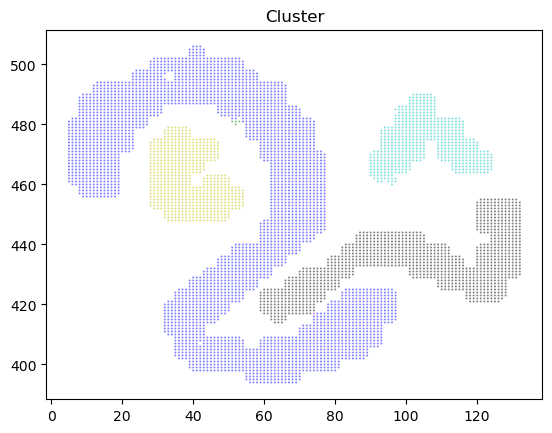

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_dbscan(db,data,n_samples):
    plt.figure()
    plt.title("Cluster")
    # set the list of colors to be selected when plotting the different clusters
    color=['b','y','g','k','m','c','r','w']
        
    #plot the dataset
    k = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    for clu in range(k):
        # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
        data_list_x = [data[i,0] for i in range(n_samples) if db.labels_[i]==clu]
        data_list_y = [data[i,1] for i in range(n_samples) if db.labels_[i]==clu]
        plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)
        
    plt.show()


eps = 1 # number of points that fall into a portion;
min_pts = 5 # core point density threshold = minimum number of points to make a portion high intensity
db = DBSCAN(eps=eps, min_samples=min_pts).fit(data2)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print('Estimated number of core points: %d' % len(db.core_sample_indices_))
print('Estimated number of border points: %d' % (len(labels)-n_noise_))

plot_dbscan(db,data2,n_samples2)


# In the following cell I propose you to: 

1.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
2. Sort the set of reachability distances you obtained in an increasing way.
3. Plot the sorted reachability distances
4. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
5. Try this combined pair of parameters on the dataset you chose, with DBSCAN.